In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df_src = pd.read_csv('Building_Violations.csv')
gdf = gpd.read_file("boundaries-zipcode.geojson")

In [5]:
# check first 5 rows
df_src.head()

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,LOCATION
0,1218020,10/17/2006,04/26/2006,BR1001,OPEN,NaN,OWNER OR LICENSED CONTRACTOR,NaN,NaN,The code violations listed below must be corre...,...,3500 N HOYNE AVE,3500,N,HOYNE,AVE,131287,NaN,41.945098,-87.681079,"(41.945098077372535, -87.68107885384137)"
1,1587577,08/22/2006,01/20/2006,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",NaN,EAST WINDOW PANES BROKEN,"Replace broken, missing or defective window pa...",...,9129 S COMMERCIAL AVE,9129,S,COMMERCIAL,AVE,475460,5.0,41.729193,-87.551088,"(41.72919293390076, -87.5510883676378)"
2,1787465,01/23/2007,12/06/2006,CN132016,COMPLIED,01/11/2007,HEAT UNIT ADEQUATELY,NaN,INADEQUATE TEMPERATURE NO HEAT IN UNIT (3F) DU...,Heat dwelling unit adequately from September 1...,...,1131 S MOZART ST,1131,S,MOZART,ST,257101,NaN,41.867352,-87.696999,"(41.86735235712279, -87.69699881056887)"
3,1787466,12/13/2006,12/11/2006,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",NaN,BROKEN WINDOW PANES: EAST ELEVATION AND BASEMENT,"Replace broken, missing or defective window pa...",...,6729 S ADA ST,6729,S,ADA,ST,397358,NaN,41.771401,-87.657781,"(41.77140078127146, -87.65778095737407)"
4,1787467,12/31/2006,12/08/2006,CN107035,OPEN,NaN,MAINTAIN EXIT SIGN ILLUMINATED,NaN,2ND FLOOR EXIT SIGN NOT WORK,Failed to maintain all exit signs illuminated ...,...,9138 S COMMERCIAL AVE,9138,S,COMMERCIAL,AVE,21461,5.0,41.728905,-87.551374,"(41.72890516933711, -87.55137391709914)"


In [6]:
# check all columns, types, and the NaN
df_src.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880634 entries, 0 to 1880633
Data columns (total 26 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ID                            1880634 non-null  int64  
 1   VIOLATION LAST MODIFIED DATE  1880634 non-null  object 
 2   VIOLATION DATE                1880634 non-null  object 
 3   VIOLATION CODE                1880634 non-null  object 
 4   VIOLATION STATUS              1880634 non-null  object 
 5   VIOLATION STATUS DATE         773206 non-null   object 
 6   VIOLATION DESCRIPTION         1867654 non-null  object 
 7   VIOLATION LOCATION            898246 non-null   object 
 8   VIOLATION INSPECTOR COMMENTS  1697496 non-null  object 
 9   VIOLATION ORDINANCE           1824616 non-null  object 
 10  INSPECTOR ID                  1880634 non-null  object 
 11  INSPECTION NUMBER             1880634 non-null  int64  
 12  INSPECTION STATUS           

'VIOLATION STATUS DATE, VIOLATION DESCRIPTION, VIOLATION LOCATION, VIOLATION INSPECTOR COMMENTS, VIOLATION ORDINANCE, INSPECTION STATUS, STREET TYPE, SSA, LATITUDE, LONGITUDE, LOCATION' have the null values

In [7]:
## delete rows that latitude, longitude, location is null
df_nonNull = df_src[["LATITUDE", "LONGITUDE", "LOCATION"]].notnull().all(1)
df_src = df_src[df_nonNull]
df_src

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,LOCATION
0,1218020,10/17/2006,04/26/2006,BR1001,OPEN,NaN,OWNER OR LICENSED CONTRACTOR,NaN,NaN,The code violations listed below must be corre...,...,3500 N HOYNE AVE,3500,N,HOYNE,AVE,131287,NaN,41.945098,-87.681079,"(41.945098077372535, -87.68107885384137)"
1,1587577,08/22/2006,01/20/2006,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",NaN,EAST WINDOW PANES BROKEN,"Replace broken, missing or defective window pa...",...,9129 S COMMERCIAL AVE,9129,S,COMMERCIAL,AVE,475460,5.0,41.729193,-87.551088,"(41.72919293390076, -87.5510883676378)"
2,1787465,01/23/2007,12/06/2006,CN132016,COMPLIED,01/11/2007,HEAT UNIT ADEQUATELY,NaN,INADEQUATE TEMPERATURE NO HEAT IN UNIT (3F) DU...,Heat dwelling unit adequately from September 1...,...,1131 S MOZART ST,1131,S,MOZART,ST,257101,NaN,41.867352,-87.696999,"(41.86735235712279, -87.69699881056887)"
3,1787466,12/13/2006,12/11/2006,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",NaN,BROKEN WINDOW PANES: EAST ELEVATION AND BASEMENT,"Replace broken, missing or defective window pa...",...,6729 S ADA ST,6729,S,ADA,ST,397358,NaN,41.771401,-87.657781,"(41.77140078127146, -87.65778095737407)"
4,1787467,12/31/2006,12/08/2006,CN107035,OPEN,NaN,MAINTAIN EXIT SIGN ILLUMINATED,NaN,2ND FLOOR EXIT SIGN NOT WORK,Failed to maintain all exit signs illuminated ...,...,9138 S COMMERCIAL AVE,9138,S,COMMERCIAL,AVE,21461,5.0,41.728905,-87.551374,"(41.72890516933711, -87.55137391709914)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880629,6991105,06/26/2023,06/26/2023,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING-NO RESPONSE,UNVERIFIED DE...",Arrange for inspection of premises. (13-12-100),...,2310 N TRIPP AVE,2310,N,TRIPP,AVE,92447,NaN,41.922954,-87.732995,"(41.92295352777417, -87.73299459912143)"
1880630,6990885,06/26/2023,06/26/2023,EV1110,OPEN,NaN,MAINTAIN OR REPAIR ELECT ELEVA,NaN,PROPERLY SERVICE % MAINTAIN #! IS OUT OF SERVICE,Failed to maintain electric elevator equipment...,...,3555 S COTTAGE GROVE AVE,3555,S,COTTAGE GROVE,AVE,17694,NaN,41.829736,-87.609707,"(41.82973619181123, -87.60970729068762)"
1880631,6990895,06/22/2023,06/22/2023,CN076044,OPEN,NaN,REPAIR DOWNSPOUT,EXTERIOR:E :,EAST ELEVATION - UNIT A / DOWNSPOUT / MISSING.,Failed to maintain roof downspouts in good rep...,...,9622 S HALSTED ST,9622,S,HALSTED,ST,571417,NaN,41.718661,-87.643283,"(41.71866053239211, -87.64328270093519)"
1880632,6990911,06/22/2023,06/22/2023,CN067024,OPEN,NaN,REPAIR EAVES,EXTERIOR:W :,WEST ELEVATION - EAVES CAPPING / BROKEN AND MI...,Failed to maintain roof eaves in good repair a...,...,1620 E 75TH ST,1620,E,75TH,ST,407106,42.0,41.758889,-87.584888,"(41.758889235591795, -87.58488834217916)"


In [13]:
# fill value to NaN
df_src.fillna('Unknown', inplace=True)
df_src

C:\Users\szhao69\AppData\Local\Temp\ipykernel_5272\3739118749.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_src.fillna('Unknown', inplace=True)


,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,LOCATION
0,1218020,10/17/2006,2006-04-26,BR1001,OPEN,Unknown,OWNER OR LICENSED CONTRACTOR,Unknown,Unknown,The code violations listed below must be corre...,...,3500 N HOYNE AVE,3500,N,HOYNE,AVE,131287,Unknown,41.945098,-87.681079,"(41.945098077372535, -87.68107885384137)"
1,1587577,08/22/2006,2006-01-20,CN104015,OPEN,Unknown,"REPLCE WINDOW PANES, PLEXGLAS",Unknown,EAST WINDOW PANES BROKEN,"Replace broken, missing or defective window pa...",...,9129 S COMMERCIAL AVE,9129,S,COMMERCIAL,AVE,475460,5.0,41.729193,-87.551088,"(41.72919293390076, -87.5510883676378)"
2,1787465,01/23/2007,2006-12-06,CN132016,COMPLIED,01/11/2007,HEAT UNIT ADEQUATELY,Unknown,INADEQUATE TEMPERATURE NO HEAT IN UNIT (3F) DU...,Heat dwelling unit adequately from September 1...,...,1131 S MOZART ST,1131,S,MOZART,ST,257101,Unknown,41.867352,-87.696999,"(41.86735235712279, -87.69699881056887)"
3,1787466,12/13/2006,2006-12-11,CN104015,OPEN,Unknown,"REPLCE WINDOW PANES, PLEXGLAS",Unknown,BROKEN WINDOW PANES: EAST ELEVATION AND BASEMENT,"Replace broken, missing or defective window pa...",...,6729 S ADA ST,6729,S,ADA,ST,397358,Unknown,41.771401,-87.657781,"(41.77140078127146, -87.65778095737407)"
4,1787467,12/31/2006,2006-12-08,CN107035,OPEN,Unknown,MAINTAIN EXIT SIGN ILLUMINATED,Unknown,2ND FLOOR EXIT SIGN NOT WORK,Failed to maintain all exit signs illuminated ...,...,9138 S COMMERCIAL AVE,9138,S,COMMERCIAL,AVE,21461,5.0,41.728905,-87.551374,"(41.72890516933711, -87.55137391709914)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880629,6991105,06/26/2023,2023-06-26,CN190019,OPEN,Unknown,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING-NO RESPONSE,UNVERIFIED DE...",Arrange for inspection of premises. (13-12-100),...,2310 N TRIPP AVE,2310,N,TRIPP,AVE,92447,Unknown,41.922954,-87.732995,"(41.92295352777417, -87.73299459912143)"
1880630,6990885,06/26/2023,2023-06-26,EV1110,OPEN,Unknown,MAINTAIN OR REPAIR ELECT ELEVA,Unknown,PROPERLY SERVICE % MAINTAIN #! IS OUT OF SERVICE,Failed to maintain electric elevator equipment...,...,3555 S COTTAGE GROVE AVE,3555,S,COTTAGE GROVE,AVE,17694,Unknown,41.829736,-87.609707,"(41.82973619181123, -87.60970729068762)"
1880631,6990895,06/22/2023,2023-06-22,CN076044,OPEN,Unknown,REPAIR DOWNSPOUT,EXTERIOR:E :,EAST ELEVATION - UNIT A / DOWNSPOUT / MISSING.,Failed to maintain roof downspouts in good rep...,...,9622 S HALSTED ST,9622,S,HALSTED,ST,571417,Unknown,41.718661,-87.643283,"(41.71866053239211, -87.64328270093519)"
1880632,6990911,06/22/2023,2023-06-22,CN067024,OPEN,Unknown,REPAIR EAVES,EXTERIOR:W :,WEST ELEVATION - EAVES CAPPING / BROKEN AND MI...,Failed to maintain roof eaves in good repair a...,...,1620 E 75TH ST,1620,E,75TH,ST,407106,42.0,41.758889,-87.584888,"(41.758889235591795, -87.58488834217916)"


In [14]:
# check cleaned data
df_src.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1878765 entries, 0 to 1880633
Data columns (total 26 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   ID                            1878765 non-null  int64         
 1   VIOLATION LAST MODIFIED DATE  1878765 non-null  object        
 2   VIOLATION DATE                1878765 non-null  datetime64[ns]
 3   VIOLATION CODE                1878765 non-null  object        
 4   VIOLATION STATUS              1878765 non-null  object        
 5   VIOLATION STATUS DATE         1878765 non-null  object        
 6   VIOLATION DESCRIPTION         1878765 non-null  object        
 7   VIOLATION LOCATION            1878765 non-null  object        
 8   VIOLATION INSPECTOR COMMENTS  1878765 non-null  object        
 9   VIOLATION ORDINANCE           1878765 non-null  object        
 10  INSPECTOR ID                  1878765 non-null  object        
 11  INS

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,LOCATION
4439,6991282,06/27/2023,2023-06-27,PL151137,OPEN,Unknown,OPEN,Unknown,Unknown,Unknown,...,4730 N ST LOUIS AVE,4730,N,ST LOUIS,AVE,177465,Unknown,41.967493,-87.715929,"(41.96749250838773, -87.71592900208108)"
5707,6912372,06/27/2023,2023-02-07,EV1111,COMPLIED,06/26/2023,MAINTAIN OR REPAIR HYDRO ELEVA,Unknown,MACHINE ROOM FIRE EXTINGUSHER,Failed to maintain hydraulic elevator equipmen...,...,1357 N ELSTON AVE,1357,N,ELSTON,AVE,59589,Unknown,41.907049,-87.659765,"(41.90704947171354, -87.6597649708448)"
6168,6912374,06/27/2023,2023-02-07,EV1111,COMPLIED,06/26/2023,MAINTAIN OR REPAIR HYDRO ELEVA,Unknown,CLEAR LANDINGS,Failed to maintain hydraulic elevator equipmen...,...,1357 N ELSTON AVE,1357,N,ELSTON,AVE,59589,Unknown,41.907049,-87.659765,"(41.90704947171354, -87.6597649708448)"
7461,6945177,06/27/2023,2023-04-19,CN104015,COMPLIED,06/27/2023,"REPLCE WINDOW PANES, PLEXGLAS",EXTERIOR:SW : PER PIC'S E-MAILED,1ST FLOOR/WINDOW - CRACKED PANE,"Replace broken, missing or defective window pa...",...,2346 E 96TH ST,2346,E,96TH,ST,482855,Unknown,41.721457,-87.566138,"(41.72145662886191, -87.56613776358998)"
7523,6945178,06/27/2023,2023-04-19,CN073014,COMPLIED,06/27/2023,REPAIR EXTERIOR DOOR,EXTERIOR:SW :PER PIC'S OF E-MAIL SENT,FRONT SECURITY DOOR - CRACKED PLEXIGLASS PANE,Failed to maintain exterior door in sound cond...,...,2346 E 96TH ST,2346,E,96TH,ST,482855,Unknown,41.721457,-87.566138,"(41.72145662886191, -87.56613776358998)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880629,6991105,06/26/2023,2023-06-26,CN190019,OPEN,Unknown,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING-NO RESPONSE,UNVERIFIED DE...",Arrange for inspection of premises. (13-12-100),...,2310 N TRIPP AVE,2310,N,TRIPP,AVE,92447,Unknown,41.922954,-87.732995,"(41.92295352777417, -87.73299459912143)"
1880630,6990885,06/26/2023,2023-06-26,EV1110,OPEN,Unknown,MAINTAIN OR REPAIR ELECT ELEVA,Unknown,PROPERLY SERVICE % MAINTAIN #! IS OUT OF SERVICE,Failed to maintain electric elevator equipment...,...,3555 S COTTAGE GROVE AVE,3555,S,COTTAGE GROVE,AVE,17694,Unknown,41.829736,-87.609707,"(41.82973619181123, -87.60970729068762)"
1880631,6990895,06/22/2023,2023-06-22,CN076044,OPEN,Unknown,REPAIR DOWNSPOUT,EXTERIOR:E :,EAST ELEVATION - UNIT A / DOWNSPOUT / MISSING.,Failed to maintain roof downspouts in good rep...,...,9622 S HALSTED ST,9622,S,HALSTED,ST,571417,Unknown,41.718661,-87.643283,"(41.71866053239211, -87.64328270093519)"
1880632,6990911,06/22/2023,2023-06-22,CN067024,OPEN,Unknown,REPAIR EAVES,EXTERIOR:W :,WEST ELEVATION - EAVES CAPPING / BROKEN AND MI...,Failed to maintain roof eaves in good repair a...,...,1620 E 75TH ST,1620,E,75TH,ST,407106,42.0,41.758889,-87.584888,"(41.758889235591795, -87.58488834217916)"


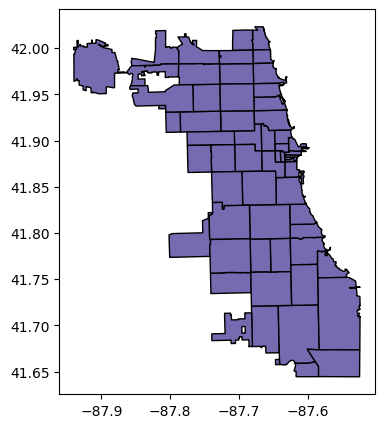

In [15]:
# conver 'VIOLATION DATE' type from object to datetime
df_src["VIOLATION DATE"] = pd.to_datetime(df_src["VIOLATION DATE"])
df_src
df_2023 = df_src[df_src['VIOLATION DATE'] > '2023-01-01']
gdf.plot(figsize=(5,5), color='#756bb1', edgecolor='black')
df_2023